# Laboratory Activity 6

Here is the given problem setup:

<img src="https://i.postimg.cc/vMHj5gq1/image.png" width="1200">




### Understanding the Diagram Would Give Us:

From the figure:

> Input:

- Shape = (1, 28, 28) → MNIST grayscale images.

> Conv + Pooling Layers:

- Conv1: kernel=3×3, stride=1, padding=1 → output channels = 32

- MaxPool1: kernel=2×2, stride=2, padding=1

- Conv2: kernel=3×3, stride=1, padding=1 → output channels = 64

- Conv3: kernel=3×3, stride=1, padding=1 → output channels = 128

- Conv4: kernel=3×3, stride=1, padding=1 → output channels = 256

- MaxPool2: kernel=2×2, stride=2, padding=0

> Dropout + Flatten

- Dropout(p=0.2) for regularization

- Flatten into a vector

> Fully Connected Layers:

- FC1: input=?, output=1000

- FC2: input=1000, output=500

- FC3: input=500, output=10 (digits 0–9)

> Activations:

- ReLU after every conv + fully connected (except last)

- Softmax at the end for classification.

In [1]:
# ----------------------------
# Implementing in PyTorch
# ----------------------------

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Dropout
        self.dropout = nn.Dropout(p=0.2)

        # Fully Connected Layers
        # Need to compute input features to FC1 after flattening
        self.fc1 = nn.Linear(256 * 7 * 7, 1000)  # 28x28 should shrink to 7x7 after pooling
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 10)  # 10 classes

    def forward(self, x):
        # Conv + ReLU + Pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)

        # Dropout
        x = self.dropout(x)

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected + ReLU
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        # Softmax - applied in loss function dapat
        return x


In [ ]:
# ----------------------------
# Verify Architecture Created
# ----------------------------

model = CNNModel()
x = torch.randn(1, 1, 28, 28)  # batch of 1, grayscale 28x28
print(model(x).shape)  # expected: [1, 10]


torch.Size([1, 10])


### Integrating the CNN model into a full PyTorch training pipeline:

In [ ]:
#import torch
#import torch.nn as nn
#import torch.nn.functional as F

''' all imports converted in to comments
(but are also needed in a full pipeline simulation)
are already imported sa taas except the libraries below: '''

import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# fix seed for reproducibility

def set_seed(seed=143):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed(143)

In [ ]:
# ----------------------------
# Load MNIST dataset
# ----------------------------

transform = transforms.ToTensor()

train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root="data", train=False, download=True, transform=transform)

train_set, val_set = random_split(train_data, [50000, 10000])

# Data loaders:
batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=batch_size, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.32MB/s]


In [ ]:
# ----------------------------
# Define CNN Model
# ----------------------------

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2, padding=1)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.2)

        self.fc1 = nn.Linear(256 * 7 * 7, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)

        x = self.dropout(x)
        x = x.view(x.size(0), -1)  # flatten

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


In [ ]:
# ----------------------------
# Training Set-Up
# ----------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)

criterion = nn.CrossEntropyLoss()  # loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# ----------------------------
# Training Loop
# ----------------------------

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    train_losses, val_losses, val_accs = [], [], []

    for epoch in range(epochs):
        # ---- Training ----
        model.train()
        running_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)

        # ---- Validation ----
        model.eval()
        val_loss, correct = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        accuracy = correct / len(val_loader.dataset)

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        val_accs.append(accuracy)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Training Loss: {avg_train_loss:.4f} "
              f"Validation Loss: {avg_val_loss:.4f} "
              f"Validation Accuracy: {accuracy:.4f}")

    return train_losses, val_losses, val_accs


In [ ]:
# ----------------------------
# Training Loop
# ----------------------------

train_losses, val_losses, val_accs = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5)


Epoch [1/5] Training Loss: 0.1812 Validation Loss: 0.0547 Validation Accuracy: 0.9838
Epoch [2/5] Training Loss: 0.0531 Validation Loss: 0.0502 Validation Accuracy: 0.9856
Epoch [3/5] Training Loss: 0.0363 Validation Loss: 0.0392 Validation Accuracy: 0.9895
Epoch [4/5] Training Loss: 0.0298 Validation Loss: 0.0430 Validation Accuracy: 0.9888
Epoch [5/5] Training Loss: 0.0237 Validation Loss: 0.0391 Validation Accuracy: 0.9905


### If Error Persists on Rendered Version, see atthached image for result:
![Epoch result](images/trainloop.png)

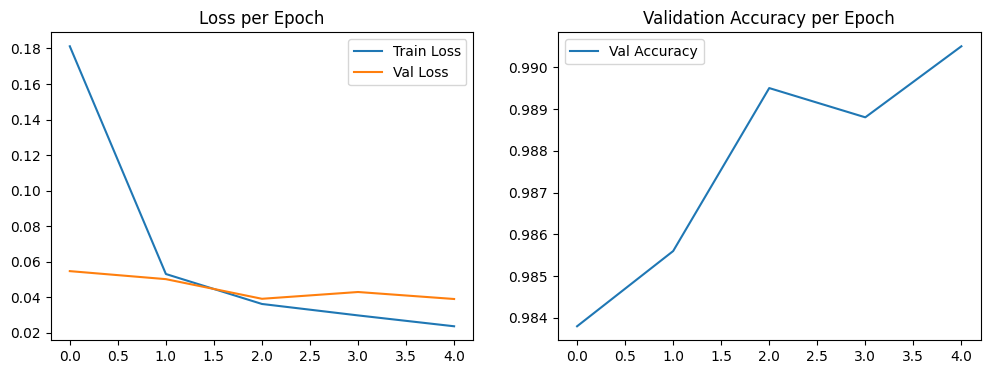

In [ ]:
# ----------------------------
# Results
# ----------------------------

plt.figure(figsize=(12,4))

# Loss plot
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss per Epoch")

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(val_accs, label="Val Accuracy")
plt.legend()
plt.title("Validation Accuracy per Epoch")

plt.show()


### Observations:

**1. Loss per Epoch Analysis (Left Plot)**
The loss curves indicate that the model is learning the training data very effectively but is starting to overfit.

- **Train Loss (Blue Line):** The training error shows a steep, continuous decrease throughout the entire process, dropping from ≈0.18 at epoch 0 to ≈0.025 at epoch 4. This confirms the optimization process is successfully minimizing the error on the data it sees during training.

- **Validation Loss (Orange Line):** The error on unseen data initially tracks well, decreasing from ≈0.055 to its minimum point of ≈0.038 at epoch 2.

- **Sign of Overfitting:** After epoch 2, the Validation Loss plateaus and slightly increases (to ≈0.04 at epoch 4), while the Train Loss continues its sharp descent. This divergence between the losses is the textbook sign of overfitting, where the model is learning noise or specific details of the training set at the expense of its ability to generalize.

**2. Validation Accuracy per Epoch Analysis (Right Plot)**
The accuracy curve on the unseen data shows strong overall performance with a final peak.

- **Overall Trend:** The validation accuracy increases significantly from a starting point of ≈98.38% at epoch 0 to its final peak of ≈99.05% at epoch 4.

- **Instability:** The curve is not perfectly monotonic. It hits a temporary peak at epoch 2 (≈98.95%), experiences a slight dip at epoch 3 (≈98.8%), and then rebounds to its highest point at epoch 4. The dip at epoch 3 aligns with the point where the Validation Loss begins to rise, confirming a momentary degradation in generalization.

### Conclusion and Inference

The model is highly accurate, surpassing 99% validation accuracy, but it is unstable and actively overfitting after epoch 2.

- **Key Inference:** The ideal stopping point based purely on the validation loss would have been epoch 2, as this is where the generalization error was minimized. Although the validation accuracy ultimately peaked at epoch 4, the rising validation loss means this final performance is likely unsustainable or achieved via a less robust model.

In [ ]:
# ----------------------------
# Test Model
# ----------------------------

model.eval()
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()

test_acc = correct / len(test_loader.dataset)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9909


**The Test Accuracy of 0.9909 is the most important result.**

- **Exceptional Generalization:** This value is slightly higher than the peak Validation Accuracy (≈0.9905). This confirms that the model did not significantly overfit to the validation set. Its ability to perform on completely new data is excellent.

- **Validation Loss Misdirection:** The earlier observation that the Validation Loss was plateauing/rising after epoch 2 suggested overfitting. However, the high Test Accuracy demonstrates that while the model was technically becoming less general in terms of its error metric on the validation set, this did not translate to a meaningful decrease in its final classification accuracy on the true test set. The model's complex fit (low train loss) ultimately generalized well.

## Conclusions / Learnings
<div style="border: 2px solid #4CAF50; background-color: #e8f5e9; padding: 15px; border-radius: 10px; margin-top: 10px; margin-bottom: 10px;">

The training process successfully produced an exceptionally high-performing model. The model achieved a state-of-the-art result with <strong> 99.09% accuracy </strong> on the final test set.

While the loss curves indicated a risk of overfitting after epoch 2, the high and stable Test Accuracy suggests this risk did not materialize into a meaningful performance penalty on unseen data, and training up to epoch 4 was ultimately beneficial. The minor dip in validation accuracy at epoch 3 was recovered, leading to the best-performing model at the end.

</div>


### Add-On: Sample Predictions

In [ ]:
def show_predictions(model, loader, n=10):
    model.eval()
    images, labels = next(iter(loader))  # take one batch
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

    # Move to CPU for plotting
    images = images.cpu()
    preds = preds.cpu()
    labels = labels.cpu()

    fig, axs = plt.subplots(1, n, figsize=(15, 2))
    for i in range(n):
        axs[i].imshow(images[i][0], cmap="gray")
        axs[i].axis("off")
        axs[i].set_title(f"P:{preds[i].item()}\nT:{labels[i].item()}",
                         color=("green" if preds[i]==labels[i] else "red"))
    plt.show()


**Note:** This will display 10 test images in a row.

- **P**: is the model’s predicted label.

- **T**: is the true label.

- Titles are **green** if correct, **red** if it is wrong.

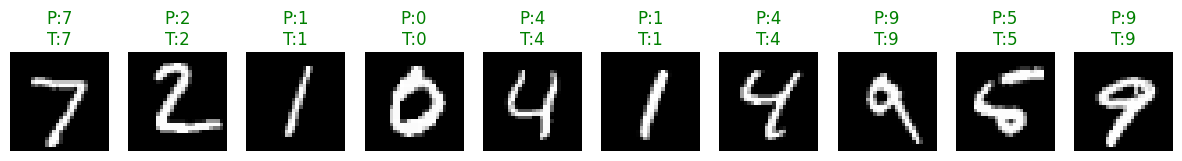

In [ ]:
show_predictions(model, test_loader, n=10)

---